In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import FloatSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13

# Najprej poskušam reševati eksaktno, bom potem obračal enačbe gnile buh jih nima rad 

In [2]:
def eksaktno(x_0 = 1,
             y_0 = 1,
             z_0 = 0,
             v_0 = 0,
             u_0 = 0,
             ND=100,
             TS=0.5
            ):
    """Rešujem 5 diferencialnih enačb"""
    pocasi = 0.1
    hitro = 10
    k1=pocasi
    k2=hitro
    k3=hitro
    k4=hitro
    k5=hitro
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)    
    INPUT = np.array([x_0, y_0,z_0, u_0, v_0])
    
    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((5))
        V = INP
        Y[0] = -k3*V[4]*V[0]+k4*V[2]*V[3]
        Y[1] = -k1*V[1]+k2*(V[4])**2 - k5*V[3]*V[1]
        Y[2] =  k3*V[4]*V[0]-k4*V[2]*V[3]+k5*V[3]*V[1]
        Y[3] = k3 * V[4]*V[0]-k4*V[2]*V[3]-k5*V[3]*V[1]
        Y[4] = 2*k1*V[1]-2*k2*(V[4])**2 +k5*V[3]*V[1]+k4*V[2]*V[3]-k3*V[4]*V[0]
        return Y   # For odeint
    
    RES = odeint(diff_eqs,INPUT,t_range)
    return RES, t_range
    

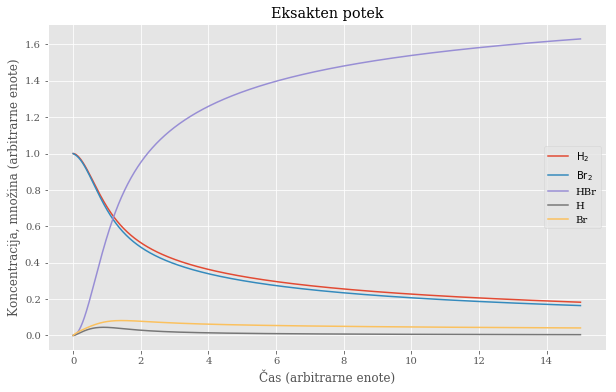

In [3]:
RES, t_range = eksaktno(TS=1e-2, ND=15)
plt.figure(figsize=(10, 6))
plt.plot(t_range, RES[:,0], label=r"$\mathrm{H}_2$")
plt.plot(t_range, RES[:,1], label=r"$\mathrm{Br}_2$")
plt.plot(t_range, RES[:,2], label="HBr")
plt.plot(t_range, RES[:,3], label="H")
plt.plot(t_range, RES[:,4], label="Br")
plt.legend(loc="center right")
plt.xlabel("Čas (arbitrarne enote)")
plt.ylabel("Koncentracija, množina (arbitrarne enote)")
plt.title("Eksakten potek")
plt.savefig("eksaktno3.pdf")
plt.savefig("eksaktno3.jpg")
plt.show()

# Eksaktna simulacija spektakularno pogorela. Grem dalje, obračat enačbe itd.

Ubistvu ni take panike, sm sm narube jemu EN FAKIN PREDZNAK sori tip no, nism vidu de sa diferencialne enačbe tuk živčne na en sam pazablen minus...

# Nadaljujem z skiciranjem in eksaktnim poračunavanjem

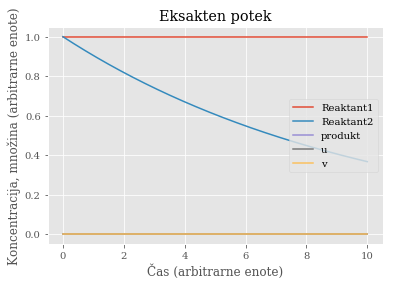

In [4]:
def stac1(x_0 = 1,
             y_0 = 1,
             z_0 = 0,
             v_0 = 0,
             u_0 = 0,
             ND=100,
             TS=0.5
            ):
    """Rešujem 5 diferencialnih enačb"""
    pocasi = 0.1
    hitro = 10
    k1=pocasi
    k2=hitro
    k3=hitro
    k4=hitro
    k5=hitro
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)    
    INPUT = np.array([x_0, y_0,z_0, u_0, v_0])
    
    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((5))
        V = INP
        Y[0] = -k3*V[4]*V[0]+k4*V[2]*V[3]
        Y[1] = -k1*V[1]+k2*(V[4])**2 - k5*V[3]*V[1]
        Y[2] =  k3*V[4]*V[0]-k4*V[2]*V[3]+k5*V[3]*V[1]
        Y[3] = 0#k3 * V[4]*V[0]-k4*V[2]*V[3]-k5*V[3]*V[1]
        Y[4] = 0#2*k1*V[1]-2*k2*(V[4])**2 +k5*V[3]*V[1]+k4*V[2]*V[3]-k3*V[4]*V[0]
        return Y   # For odeint
    
    RES = odeint(diff_eqs,INPUT,t_range)
    return RES, t_range

RES, t_range = stac1(TS=1e-2, ND=10)

plt.plot(t_range, RES[:,0], label="Reaktant1")
plt.plot(t_range, RES[:,1], label="Reaktant2")
plt.plot(t_range, RES[:,2], label="produkt")
plt.plot(t_range, RES[:,3], label="u")
plt.plot(t_range, RES[:,4], label="v")
plt.legend(loc="center right")
plt.xlabel("Čas (arbitrarne enote)")
plt.ylabel("Koncentracija, množina (arbitrarne enote)")
plt.title("Eksakten potek")
#plt.savefig("eksaktno2.pdf")
#plt.savefig("eksaktno2.jpg")
plt.show()

Spektakularno pogori

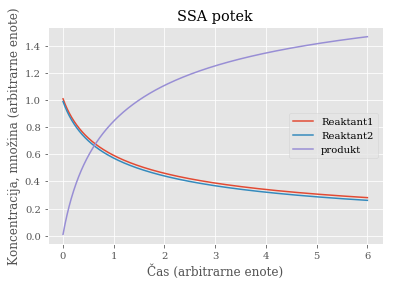

In [10]:
def stac(x_0 = 1.01,
             y_0 = .99,
             z_0 = 0.01,
             ND=100,
             TS=0.5
            ):
    """Rešujem 5 diferencialnih enačb"""
    pocasi = 0.1
    hitro = 10
    k1=pocasi
    k2=hitro*0.97
    k3=hitro*1.03
    k4=hitro*0.99
    k5=hitro*1.01
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)    
    INPUT = np.array([x_0, y_0,z_0])
    
    m = k5/k4
    k = 2*np.sqrt(k1/k2)*k3*k5/k4
    
    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((3))
        V = INP
        Y[0] = -0.5 * k* V[0] * np.sqrt(V[1])/(m + V[2]/V[1])
        Y[1] = -0.5 * k* V[0] * np.sqrt(V[1])/(m + V[2]/V[1])
        Y[2] = k * V[0] * np.sqrt(V[1])/(m + V[2]/V[1])
        return Y   # For odeint
    
    RES = odeint(diff_eqs,INPUT,t_range)
    return RES, t_range

RES, t_range = stac(TS=1e-2, ND=6)

plt.plot(t_range, RES[:,0], label="Reaktant1")
plt.plot(t_range, RES[:,1], label="Reaktant2")
plt.plot(t_range, RES[:,2], label="produkt")
plt.legend(loc="center right")
plt.xlabel("Čas (arbitrarne enote)")
plt.ylabel("Koncentracija, množina (arbitrarne enote)")
plt.title("SSA potek")
plt.savefig("SSAUSPEH.pdf")
plt.savefig("SSAUSPEH.jpg")
plt.show()

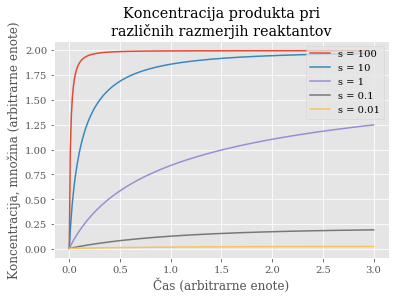

In [41]:
def skiciraj(s,#x_0 = 1.01,
             y_0 = .99,
             z_0 = 0.01,
             ND=100,
             TS=0.5
            ):
    """Rešujem 5 diferencialnih enačb"""
    pocasi = 0.1
    hitro = 10
    k1=pocasi
    k2=hitro*0.97
    k3=hitro*1.03
    k4=hitro*0.99
    k5=hitro*1.01
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)    
    INPUT = np.array([x_0, y_0,z_0])
    
    m = 2.5
    k = 2*np.sqrt(k1/k2)*k3*2.5
    x_0 = s * y_0
    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((3))
        V = INP
        Y[0] = -0.5 * k* V[0] * np.sqrt(V[1])/(m + V[2]/V[1])
        Y[1] = -0.5 * k* V[0] * np.sqrt(V[1])/(m + V[2]/V[1])
        Y[2] = k * V[0] * np.sqrt(V[1])/(m + V[2]/V[1])
        return Y   # For odeint
    
    RES = odeint(diff_eqs,INPUT,t_range)
    return RES, t_range
sji=[100,10, 1,.1, 0.01]
#import matplotlib
#cNorm  = matplotlib.colors.Normalize(vmin=min(sji), vmax=max(sji))
#scalarMap = plt.cm.ScalarMappable(norm=cNorm)
#for s in sji:
#        RES, t_range = stac(s, TS=1e-2, ND=3)
#        plt.plot(t_range, RES[:,2], label="s = {}".format(s)), c=scalarMap.to_rgba(s))
for s in sji:
        RES, t_range = stac(s, TS=1e-2, ND=3)
        plt.plot(t_range, RES[:,2], label="s = {}".format(s))

plt.legend(loc="upper right")
plt.xlabel("Čas (arbitrarne enote)")
plt.ylabel("Koncentracija, množina (arbitrarne enote)")
plt.title("Koncentracija produkta pri\nrazličnih razmerjih reaktantov")
plt.savefig("delezreaktantov2.pdf")
plt.savefig("delezreaktantov2.jpg")
plt.show()

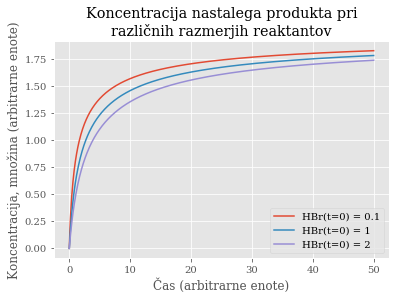

In [69]:
def skiciraj(s,#x_0 = 1.01,
             y_0 = .99,
             z_0 = 0.01,
             ND=100,
             TS=0.5
            ):
    """Rešujem 5 diferencialnih enačb"""
    pocasi = 0.1
    hitro = 10
    k1=pocasi
    k2=hitro*0.97
    k3=hitro*1.03
    k4=hitro*0.99
    k5=hitro*1.01
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)    
    INPUT = np.array([x_0, y_0,z_0])
    
    m = 2.5
    k = 2*np.sqrt(k1/k2)*k3*2.5
    x_0 = s * y_0
    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((3))
        V = INP
        Y[0] = -0.5 * k* V[0] * np.sqrt(V[1])/(m + V[2]/V[1])
        Y[1] = -0.5 * k* V[0] * np.sqrt(V[1])/(m + V[2]/V[1])
        Y[2] = k * V[0] * np.sqrt(V[1])/(m + V[2]/V[1])
        return Y   # For odeint
    
    RES = odeint(diff_eqs,INPUT,t_range)
    return RES, t_range
sji=[100,1,0.01]
zji = [0.1, 1, 2]
for z in zji:
    RES, t_range = stac(1,z_0=z, TS=1e-1, ND=50)
    plt.plot(t_range, RES[:,2]-z, label="HBr(t=0) = {}".format(z))

plt.legend(loc="lower right")
plt.xlabel("Čas (arbitrarne enote)")
plt.ylabel("Koncentracija, množina (arbitrarne enote)")
plt.title("Koncentracija nastalega produkta pri\nrazličnih razmerjih reaktantov")


#plt.savefig("s1spreminjamhbr0.pdf")
#plt.savefig("s1spreminjamhbr0.jpg")
plt.show()